# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
Le scatterplot est un type de graphique sous forme de nuage de points. Ils sont souvent utilisés pour représenter une corrélation entre variables quantitatives qui semblent être liées.
Un barplot est un type de graphique sous forme de barre ou de colonnes. Ils sont utilisés pour montrer des comparaisons numériques discrètes entre des catégories.
Un boxplot est un type de graphique sous forme de boite. Ils sont utilisés pour afficher visuellement la distribution des données à travers leurs quartiles.
Un violinplot est un type de graphique similaire aux boxplot, mais ils sont en plus capable de montrer la probabilité de densité de la donnée.
Un historigramme est un type de graphique avec des colonnes permettant de représenter la répartition empirique d'une variable aléatoire ou d'une série statistique.
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau représentant les organismes qui ont un ou plusieurs projets de séquençage du génome. 
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name -> nom de l'organisme
Kingdom Group -> taxons (bactérie, virus, eucaryotes ou archées)
SubGroup -> niveau des taxons en fonction des groupes
Size (Mb) -> taille estimée du génome
Chrs -> nombre de chromosomes
Organelles -> nombre d'organites
Plasmids -> nombre de plasmides
BioProjects -> nombre de projets de séquençage du génome
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [11]:
def count_org():
    with open("overview.txt") as f:
        return len(f.readlines()) - 1

print("Nombre d'organismes : " + str(count_org()))

Nombre d'organismes : 87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Un royaume est une catégorie de taxonomie, qui est la science des classifications. On retrouve donc plusieurs grandes catégories permettant de classifier et de trier des espèces ou des être vivants. Dans ce fichier nous retrouvons 4 royaumes distincts :
- les bactéries : micro-organisme formé d'une seule cellule, sans noyau, à structure très simple, considéré comme ni animal ni végétal.
- les virus : agent infectieux très petit, qui possède un seul type d'acide nucléique, A.D.N. ou A.R.N., et qui ne peut se reproduire qu'en parasitant une cellule.
- les eucaryotes : toute cellule ou organisme possédant un noyau clairement défini.
- les archées : micro-organisme procaryote dont les caractères biochimiques sont très différents de ceux des bactéries.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y en a 4.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [19]:
def count_kingdom():
    a = 0
    b = 0
    e = 0
    v = 0
    with open("overview.txt") as f:
        lines = f.readlines()
        kingdoms = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        for k in kingdoms:
            if k == "Bacteria":
                b += 1
            if k == "Viruses":
                v += 1
            if k == "Eukaryota":
                e += 1
            if k == "Archaea":
                a += 1
    return a, b, e, v

a, b, e, v = count_kingdom()
print("Archées : " + str(a))
print("Bactéries : " + str(b))
print("Eucaryotes : " + str(e))
print("Virus : " + str(v))

Archées : 2263
Bactéries : 37492
Eucaryotes : 15560
Virus : 32573


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un groupe est une sous-classification d'un royaume.
```

Q9. Combien de groupes sont présents par royaume ?

In [25]:
def count_groups():
    a = []
    b = []
    e = []
    v = []
    with open("overview.txt") as f:
        lines = f.readlines()
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        g = [line.split("\t")[2] for line in lines if len(line.split("\t")) > 2]
        for i in range(len(k)):
            if k[i] == "Bacteria" and g[i] not in b:
                b.append(g[i])
            if k[i] == "Viruses" and g[i] not in v:
                v.append(g[i])
            if k[i] == "Eukaryota" and g[i] not in e:
                e.append(g[i])
            if k[i] == "Archaea" and g[i] not in a:
                a.append(g[i])
    return len(a), len(b), len(e), len(v)

a, b, e, v = count_groups()
print("Archées : " + str(a))
print("Bactéries : " + str(b))
print("Eucaryotes : " + str(e))
print("Virus : " + str(v))

Archées : 11
Bactéries : 37
Eucaryotes : 5
Virus : 8


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [30]:
from collections import Counter

def count_groups():
    a = []
    b = []
    e = []
    v = []
    with open("overview.txt") as f:
        lines = f.readlines()
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        g = [line.split("\t")[2] for line in lines if len(line.split("\t")) > 2]
        for i in range(len(k)):
            if k[i] == "Bacteria":
                b.append(g[i])
            if k[i] == "Viruses":
                v.append(g[i])
            if k[i] == "Eukaryota":
                e.append(g[i])
            if k[i] == "Archaea":
                a.append(g[i])
    return a, b, e, v

def show():
    a, b, e, v = count_groups()
    ac = Counter(a)
    bc = Counter(b)
    ec = Counter(e)
    vc = Counter(v)
    print("Archées :")
    for element, count in ac.items():
        print(f"\t{element}: {count}")
    print("Bactéries :")
    for element, count in bc.items():
        print(f"\t{element}: {count}")
    print("Eucaryotes :")
    for element, count in ec.items():
        print(f"\t{element}: {count}")
    print("Virus :")
    for element, count in vc.items():
        print(f"\t{element}: {count}")

show()

Archées :
	TACK group: 408
	Candidatus Thermoplasmatota: 432
	Euryarchaeota: 1035
	Other: 1
	unclassified Archaea: 57
	Asgard group: 61
	DPANN group: 249
	Candidatus Hadarchaeota: 8
	Candidatus Hydrothermarchaeota: 6
	Halobacteriota: 1
	environmental samples: 5
Bactéries :
	Terrabacteria group: 13337
	unclassified Bacteria: 346
	FCB group: 5037
	Pseudomonadota: 11098
	Acidobacteriota: 256
	Synergistota: 85
	Bacteria incertae sedis: 3872
	PVC group: 1091
	Myxococcota: 146
	Campylobacterota: 256
	Thermodesulfobacteriota: 568
	Spirochaetota: 344
	Aquificota: 42
	Thermotogota: 72
	Atribacterota: 43
	Other: 2
	Bdellovibrionota: 122
	delta/epsilon subdivisions: 288
	Caldisericota/Cryosericota group: 21
	Deferribacterota: 27
	Calditrichota: 10
	Candidatus Lernaellota: 2
	Elusimicrobiota: 118
	Fusobacteriota: 79
	Candidatus Deferrimicrobiota: 2
	Nitrospinota/Tectimicrobiota group: 39
	Candidatus Hinthialibacterota: 2
	Candidatus Krumholzibacteriota: 4
	Nitrospirota: 156
	Candidatus Moduliflexo

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

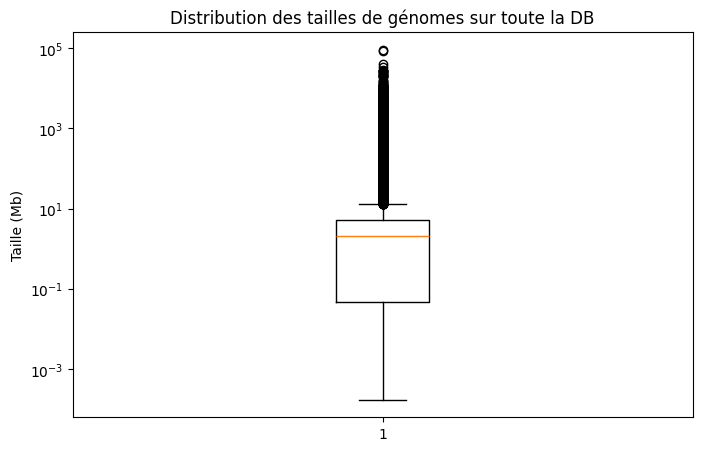

In [47]:
import matplotlib.pyplot as plt

def all_boxplot():
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        s = [float(line.split("\t")[4]) for line in lines if len(line.split("\t")) > 4 and line.split("\t")[4] != "-"]
        plt.figure(figsize=(8, 5))
        plt.boxplot(s)
        plt.title("Distribution des tailles de génomes sur toute la DB")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

all_boxplot()

Q12. Affichez la distribution par royaume.

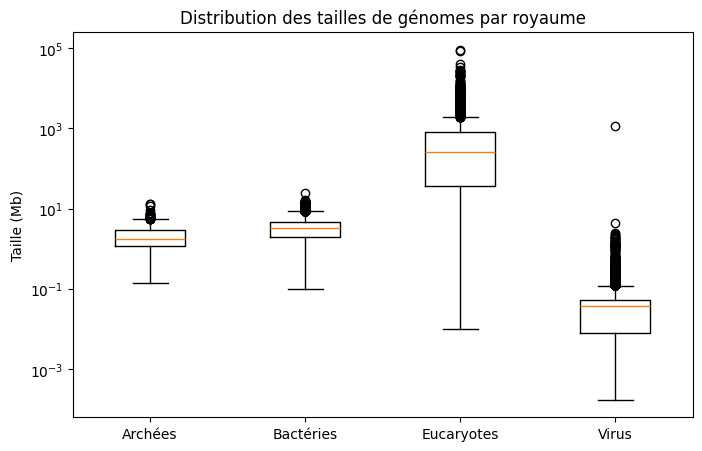

In [49]:
import matplotlib.pyplot as plt

def kingdom_boxplot():
    a = []
    b = []
    e = []
    v = []
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[4] for line in lines if len(line.split("\t")) > 4]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b.append(float(s[i]))
                if k[i] == "Viruses":
                    v.append(float(s[i]))
                if k[i] == "Eukaryota":
                    e.append(float(s[i]))
                if k[i] == "Archaea":
                    a.append(float(s[i]))
        plt.figure(figsize=(8, 5))
        plt.boxplot([a, b, e, v], labels=["Archées", "Bactéries", "Eucaryotes", "Virus"])
        plt.title("Distribution des tailles de génomes par royaume")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

kingdom_boxplot()

Q13. Affichez la distribution par groupe pour chaque royaume.

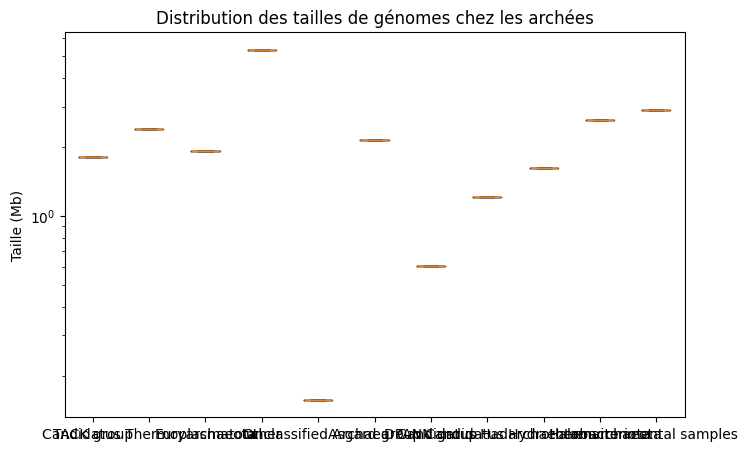

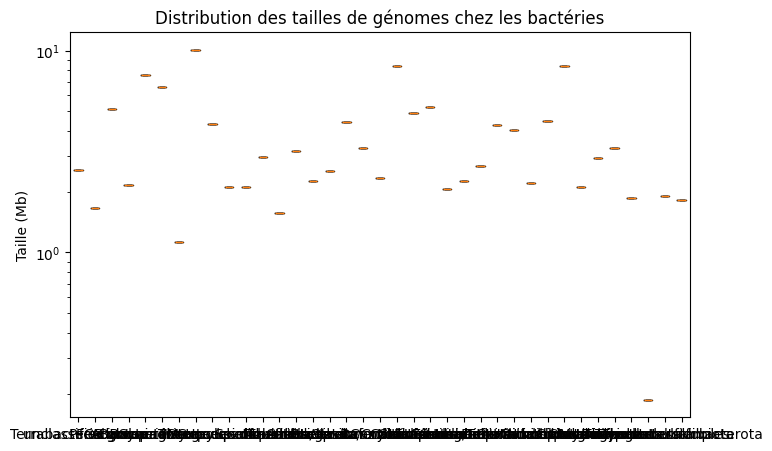

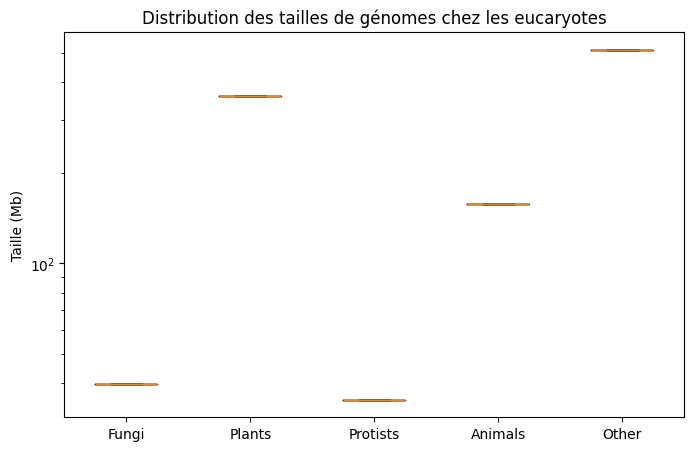

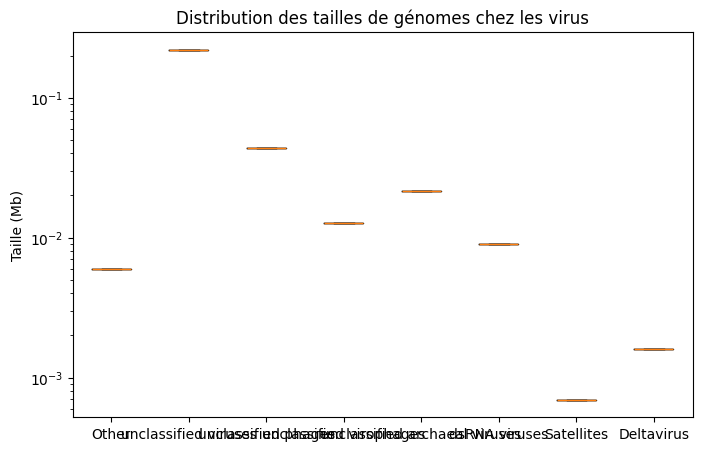

In [64]:
import matplotlib.pyplot as plt

def prep_plot(d):
    name = []
    res = []
    for key, value in d.items():
        if key in name:
            index = name.index(key)
            res[index].append(value)
        else:
            name.append(key)
            res.append([value])
    return name, res

def group_boxplot():
    a = {}
    b = {}
    e = {}
    v = {}
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[4] for line in lines if len(line.split("\t")) > 4]
        g = [line.split("\t")[2] for line in lines if len(line.split("\t")) > 2]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b[g[i]] = float(s[i])
                if k[i] == "Viruses":
                    v[g[i]] = float(s[i])
                if k[i] == "Eukaryota":
                    e[g[i]] = float(s[i])
                if k[i] == "Archaea":
                    a[g[i]] = float(s[i])
        a_name, a_res = prep_plot(a)
        plt.figure(figsize=(8, 5))
        plt.boxplot(a_res, labels=a_name)
        plt.title("Distribution des tailles de génomes chez les archées")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()
        b_name, b_res = prep_plot(b)
        plt.figure(figsize=(8, 5))
        plt.boxplot(b_res, labels=b_name)
        plt.title("Distribution des tailles de génomes chez les bactéries")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()
        e_name, e_res = prep_plot(e)
        plt.figure(figsize=(8, 5))
        plt.boxplot(e_res, labels=e_name)
        plt.title("Distribution des tailles de génomes chez les eucaryotes")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()
        v_name, v_res = prep_plot(v)
        plt.figure(figsize=(8, 5))
        plt.boxplot(v_res, labels=v_name)
        plt.title("Distribution des tailles de génomes chez les virus")
        plt.ylabel("Taille (Mb)")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

group_boxplot()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [55]:
def min_org():
    a = {}
    b = {}
    e = {}
    v = {}
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        n = [line.split("\t")[0] for line in lines if len(line.split("\t")) > 0]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[4] for line in lines if len(line.split("\t")) > 4]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b[n[i]] = float(s[i])
                if k[i] == "Viruses":
                    v[n[i]] = float(s[i])
                if k[i] == "Eukaryota":
                    e[n[i]] = float(s[i])
                if k[i] == "Archaea":
                    a[n[i]] = float(s[i])
        key_a = min(a, key=a.get)
        a_min = a[key_a]
        key_b = min(b, key=b.get)
        b_min = b[key_b]
        key_e = min(e, key=e.get)
        e_min = e[key_e]
        key_v = min(v, key=v.get)
        v_min = v[key_v]
        return a_min, b_min, e_min , v_min
        
a, b, e, v = min_org()
print("Archées : " + str(a))
print("Bactéries : " + str(b))
print("Eucaryotes : " + str(e))
print("Virus : " + str(v))

Archées : 0.137797
Bactéries : 0.101587
Eucaryotes : 0.010223
Virus : 0.000174


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [57]:
def max_org():
    a = {}
    b = {}
    e = {}
    v = {}
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        n = [line.split("\t")[0] for line in lines if len(line.split("\t")) > 0]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[4] for line in lines if len(line.split("\t")) > 4]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b[n[i]] = float(s[i])
                if k[i] == "Viruses":
                    v[n[i]] = float(s[i])
                if k[i] == "Eukaryota":
                    e[n[i]] = float(s[i])
                if k[i] == "Archaea":
                    a[n[i]] = float(s[i])
        key_a = max(a, key=a.get)
        a_min = a[key_a]
        key_b = max(b, key=b.get)
        b_min = b[key_b]
        key_e = max(e, key=e.get)
        e_min = e[key_e]
        key_v = max(v, key=v.get)
        v_min = v[key_v]
        return a_min, b_min, e_min , v_min
        
a, b, e, v = max_org()
print("Archées : " + str(a))
print("Bactéries : " + str(b))
print("Eucaryotes : " + str(e))
print("Virus : " + str(v))

Archées : 13.3999
Bactéries : 25.1426
Eucaryotes : 91113.7
Virus : 1150.68


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

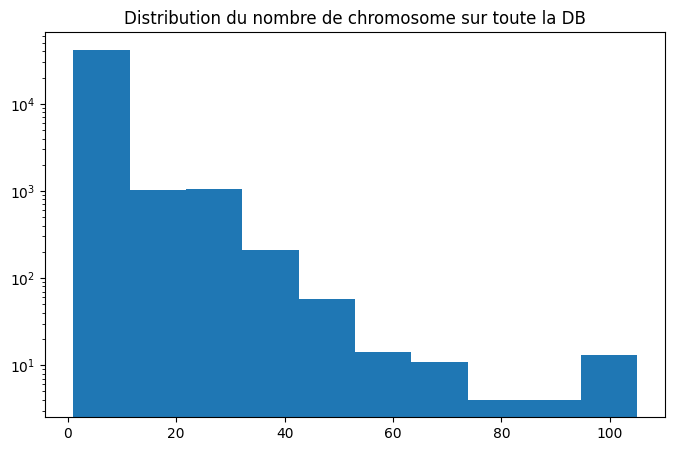

In [12]:
import matplotlib.pyplot as plt

def all_hist():
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        s = [int(line.split("\t")[5]) for line in lines if len(line.split("\t")) > 5 and line.split("\t")[5] != "-"]
        plt.figure(figsize=(8, 5))
        plt.hist(s)
        plt.title("Distribution du nombre de chromosome sur toute la DB")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

all_hist()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

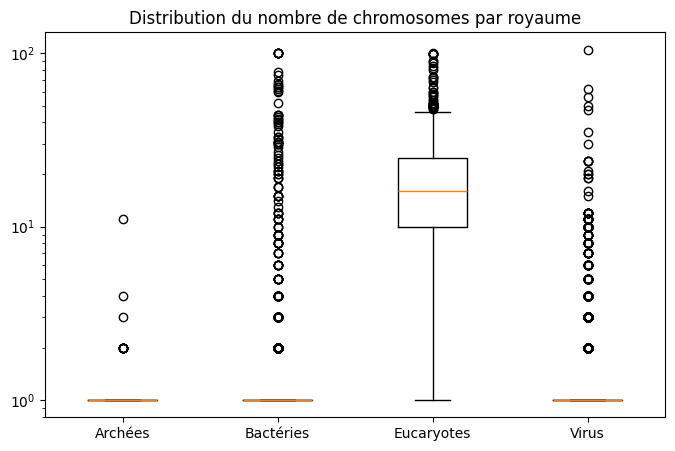

In [10]:
import matplotlib.pyplot as plt

def kingdom_hist():
    a = []
    b = []
    e = []
    v = []
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[5] for line in lines if len(line.split("\t")) > 5]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b.append(float(s[i]))
                if k[i] == "Viruses":
                    v.append(float(s[i]))
                if k[i] == "Eukaryota":
                    e.append(float(s[i]))
                if k[i] == "Archaea":
                    a.append(float(s[i]))
        plt.figure(figsize=(8, 5))
        plt.boxplot([a, b, e, v], labels=["Archées", "Bactéries", "Eucaryotes", "Virus"])
        plt.title("Distribution du nombre de chromosomes par royaume")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

kingdom_hist()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

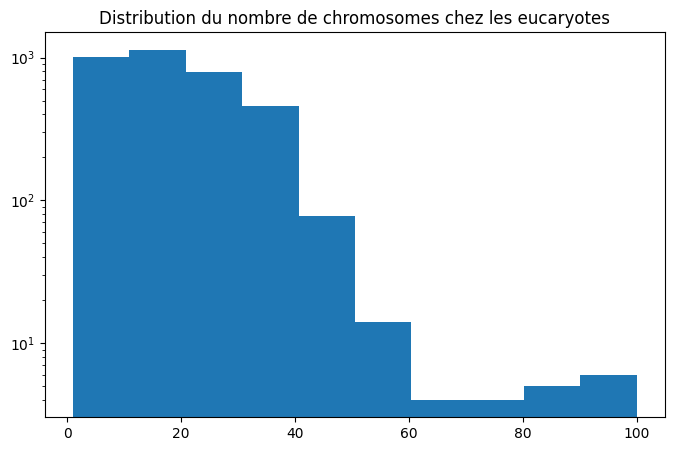

In [13]:
import matplotlib.pyplot as plt

def euca_hist():
    e = []
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[5] for line in lines if len(line.split("\t")) > 5]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Eukaryota":
                    e.append(float(s[i]))
        plt.figure(figsize=(8, 5))
        plt.hist(e)
        plt.title("Distribution du nombre de chromosomes chez les eucaryotes")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

euca_hist()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

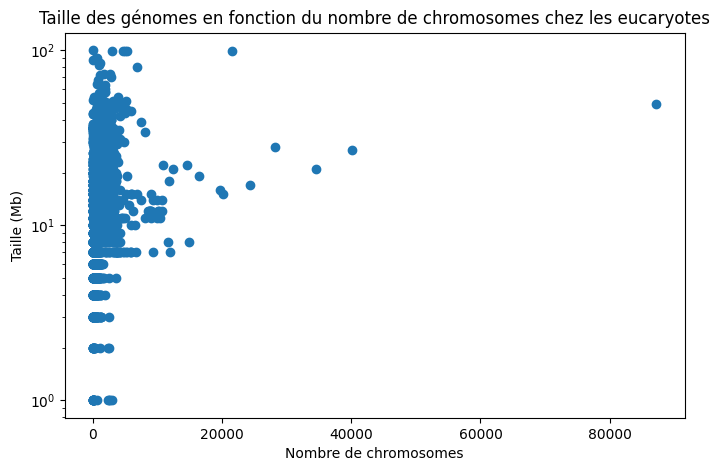

In [14]:
import matplotlib.pyplot as plt

def euca_scatter():
    es = []
    ec = []
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[4] for line in lines if len(line.split("\t")) > 4]
        c = [line.split("\t")[5] for line in lines if len(line.split("\t")) > 5]
        for i in range(len(k)):
            if s[i] != "-" and c[i] != "-":
                if k[i] == "Eukaryota":
                    es.append(float(s[i]))
                    ec.append(float(c[i]))
        plt.figure(figsize=(8, 5))
        plt.scatter(es, ec)
        plt.title("Taille des génomes en fonction du nombre de chromosomes chez les eucaryotes")
        plt.ylabel("Taille (Mb)")
        plt.xlabel("Nombre de chromosomes")
        plt.yscale("log") #Taille de l'axe Y passe au log
        plt.show()

euca_scatter()

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

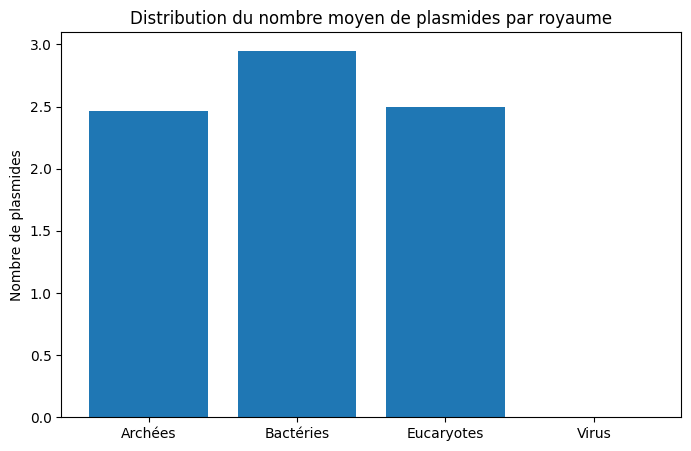

In [22]:
import matplotlib.pyplot as plt

def kingdom_bar():
    a = []
    b = []
    e = []
    v = []
    with open("overview.txt") as f:
        lines = f.readlines()[1:]
        k = [line.split("\t")[1] for line in lines if len(line.split("\t")) > 1]
        s = [line.split("\t")[7] for line in lines if len(line.split("\t")) > 7]
        for i in range(len(k)):
            if s[i] != "-":
                if k[i] == "Bacteria":
                    b.append(float(s[i]))
                elif k[i] == "Viruses":
                    v.append(float(s[i]))
                elif k[i] == "Eukaryota":
                    e.append(float(s[i]))
                elif k[i] == "Archaea":
                    a.append(float(s[i]))
    kingdoms = ["Archées", "Bactéries", "Eucaryotes", "Virus"]
    values = [sum(a)/len(a), sum(b)/len(b), sum(e)/len(e), sum(v)]
    plt.figure(figsize=(8, 5))
    plt.bar(kingdoms, values)
    plt.title("Distribution du nombre moyen de plasmides par royaume")
    plt.ylabel("Nombre de plasmides")
    plt.show()

kingdom_bar()

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici